In [28]:
# Importing libraries for gathering data and visualization
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override() # use yahoo finance for data

In [71]:
test = pdr.DataReader("^KS200", start="2008-01-02", end="2011-12-30", period='1d')
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,240.470001,240.649994,235.020004,235.300003,235.300003,76100
2008-01-03,232.940002,235.639999,230.860001,234.669998,234.669998,69000
2008-01-04,234.619995,236.589996,230.410004,235.770004,235.770004,91500
2008-01-07,229.389999,232.419998,229.089996,231.000000,231.000000,86700
2008-01-08,231.750000,232.320007,229.190002,230.339996,230.339996,88700
...,...,...,...,...,...,...
2011-12-22,240.500000,241.399994,239.669998,241.399994,241.399994,58000
2011-12-23,243.259995,244.949997,243.059998,244.220001,244.220001,82000
2011-12-27,242.690002,243.910004,236.429993,240.789993,240.789993,77800


$$ \sigma^F_t = \sqrt{ 0.5ln(\frac{F^H_t}{F^L_{t-1}}) - (2ln2-1)[ln\frac{F^C_t}{F^O_{t-1}}]^2 } $$

In [74]:
range_vol = np.sqrt( ( (1/2) * np.log(test['High'] / test['Low'].shift(1)) ) 
                    - ( (2*np.log(2)-1) ) * ( np.log(test['Close']/test['Open'].shift(1))**2 ))

d:\Mini_Conda\envs\finance\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
range_vol.std()

0.037106959526168035

In [31]:
# range_vol

In [32]:
es_df = pdr.DataReader("ES=F", start="2020-01-01", end="2022-12-31", period='1d')

[*********************100%***********************]  1 of 1 completed


In [33]:
es_df['Range'] = es_df['High'] - es_df['Low']
es_df

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75
...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50


In [34]:
es_df['Quantile_Volume'] = pd.qcut(es_df['Volume'], 10, labels= False) + 1


In [35]:
es_df

,Open,High,Low,Close,Adj Close,Volume,Range,Quantile_Volume
Date,,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50,4
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75,7
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75,5
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50,3
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75,9
...,...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25,4
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25,1
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50,3


In [36]:
es_df['Quantile_Range'] = pd.qcut(es_df['Range'], 10, labels=False) + 1

In [37]:
es_df

,Open,High,Low,Close,Adj Close,Volume,Range,Quantile_Volume,Quantile_Range
Date,,,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50,4,1
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75,7,5
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75,5,3
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50,3,2
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75,9,8
...,...,...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25,4,4
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25,1,6
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50,3,6


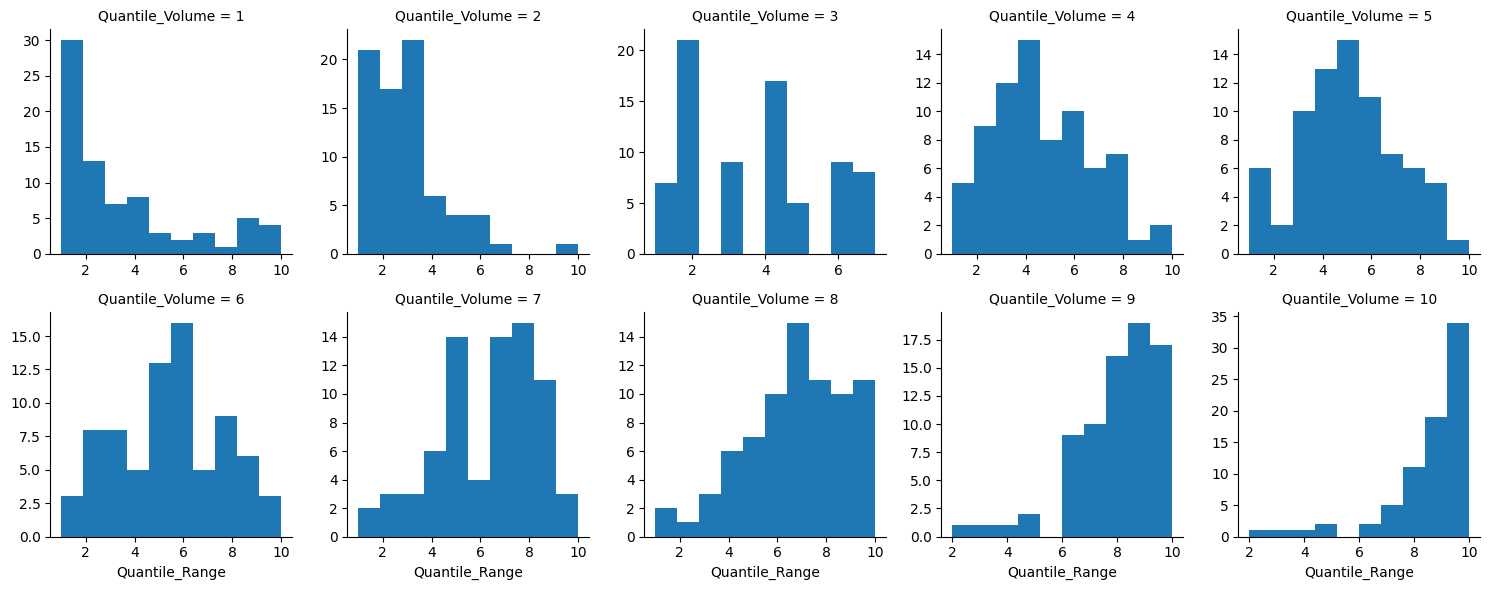

In [50]:
graph = sns.FacetGrid(es_df[["Quantile_Volume", "Quantile_Range"]], col="Quantile_Volume", sharex=False, sharey=False, col_wrap=5)
graph.map(plt.hist, 'Quantile_Range', bins=10)
plt.show()

In [39]:
es_df[['Quantile_Volume', 'Quantile_Range']].corr()

,Quantile_Volume,Quantile_Range
Quantile_Volume,1.000000,0.657759
Quantile_Range,0.657759,1.000000


In [43]:
np.corrcoef(es_df['Volume'].rank(pct=True),es_df['Range'].rank(pct=True))

array([[1.      , 0.665928],
       [0.665928, 1.      ]])

In [76]:
table3_1 = pd.read_json("D:\\부산대\\OneDrive - pusan.ac.kr\\부산대\\3학기\\특수연구\\table3-1.json")